# Aircraft Accident Analysis

Author: David Mburu


## Overview

In [182]:
#Importing libraries using their conventional aliases
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [183]:
df = pd.read_csv('data/aviation_data.csv')

c:\Users\Davey\anaconda3\envs\learn-env\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (6,7,28) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


From the warning it seems some columns do not have consistent data types, we'll fix this during the data preparation step

In [184]:
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.9222,-81.8781,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [185]:
df.tail()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
90343,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
90344,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
90345,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
90346,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
90347,20221230106513,Accident,ERA23LA097,2022-12-29,"Athens, GA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,1.0,NaN,NaN,NaN,30-12-2022


In [186]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      90348 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

The dataset has 31 columns and about 90,000 rows. Some columns like schedule have a lot of missing data

In [187]:
df.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


The dataset is asymmetric since mean and median are different values.

Hence during data cleaning it would make more sense to replace missing numerical values with the median so as not to skew the mean.

## Data Preparation

In [188]:
df.shape    #Checks the initial records of dataset before changes are made. I will keep running this command after every change to keep track of the changes I have made

(90348, 31)

### Check for duplicates

In [189]:
df.duplicated().value_counts()

False    88958
True      1390
dtype: int64

In [190]:
df[df.duplicated(keep = False)].sort_values(by = 'Event.Id')          # 'keep = false' keeps the duplicates and 'sort_values' places them next to each other

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
64030,NaN,25-09-2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64050,NaN,25-09-2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64052,NaN,25-09-2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64388,NaN,25-09-2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64541,NaN,25-09-2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90004,NaN,15-12-2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
90010,NaN,15-12-2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
90031,NaN,15-12-2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
90090,NaN,20-12-2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [191]:
clean_df = df.copy()
clean_df = clean_df.drop_duplicates()
clean_df.shape

(88958, 31)

In [192]:
clean_df.duplicated().value_counts()

False    88958
dtype: int64

The Event Id seems to be a unique feature

In [193]:
clean_df['Event.Id'].unique()
clean_df.duplicated(subset = 'Event.Id').value_counts()

False    87952
True      1006
dtype: int64

In [194]:
clean_df.drop_duplicates(subset = 'Event.Id', inplace = True)
clean_df.shape

(87952, 31)

In [195]:
clean_df['Event.Id'].isna().sum()
clean_df.dropna(subset = ['Event.Id'], inplace = True)
clean_df.shape

(87951, 31)

The Accident number also seems to be a unique feature


In [196]:
clean_df.duplicated(subset = 'Accident.Number').value_counts()
clean_df['Accident.Number'].isna().sum()

0

In [197]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87951 entries, 0 to 90347
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                87951 non-null  object 
 1   Investigation.Type      87951 non-null  object 
 2   Accident.Number         87951 non-null  object 
 3   Event.Date              87951 non-null  object 
 4   Location                87899 non-null  object 
 5   Country                 87729 non-null  object 
 6   Latitude                34212 non-null  object 
 7   Longitude               34203 non-null  object 
 8   Airport.Code            49601 non-null  object 
 9   Airport.Name            52117 non-null  object 
 10  Injury.Severity         86961 non-null  object 
 11  Aircraft.damage         84848 non-null  object 
 12  Aircraft.Category       32181 non-null  object 
 13  Registration.Number     86666 non-null  object 
 14  Make                    87888 non-null

In [198]:
clean_df.drop(columns = ['Latitude', 'Longitude', 'Airport.Code', 'FAR.Description', 'Schedule', 'Air.carrier', 'Publication.Date'], inplace = True)
# Aircraft Category has lots of missing values but we can infer the type of aircraft from the model and make columns based on previous records 

In [199]:
clean_df.info()
clean_df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87951 entries, 0 to 90347
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                87951 non-null  object 
 1   Investigation.Type      87951 non-null  object 
 2   Accident.Number         87951 non-null  object 
 3   Event.Date              87951 non-null  object 
 4   Location                87899 non-null  object 
 5   Country                 87729 non-null  object 
 6   Airport.Name            52117 non-null  object 
 7   Injury.Severity         86961 non-null  object 
 8   Aircraft.damage         84848 non-null  object 
 9   Aircraft.Category       32181 non-null  object 
 10  Registration.Number     86666 non-null  object 
 11  Make                    87888 non-null  object 
 12  Model                   87859 non-null  object 
 13  Amateur.Built           87851 non-null  object 
 14  Number.of.Engines       81924 non-null

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Airport.Name,Injury.Severity,Aircraft.damage,Aircraft.Category,...,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,Fatal(2),Destroyed,NaN,...,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,Fatal(4),Destroyed,NaN,...,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,NaN,Fatal(3),Destroyed,NaN,...,1.0,Reciprocating,Personal,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,Fatal(2),Destroyed,NaN,...,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,Fatal(1),Destroyed,NaN,...,NaN,NaN,Personal,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause


In [200]:
clean_df.reset_index(drop = True, inplace = True)

In [201]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87951 entries, 0 to 87950
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                87951 non-null  object 
 1   Investigation.Type      87951 non-null  object 
 2   Accident.Number         87951 non-null  object 
 3   Event.Date              87951 non-null  object 
 4   Location                87899 non-null  object 
 5   Country                 87729 non-null  object 
 6   Airport.Name            52117 non-null  object 
 7   Injury.Severity         86961 non-null  object 
 8   Aircraft.damage         84848 non-null  object 
 9   Aircraft.Category       32181 non-null  object 
 10  Registration.Number     86666 non-null  object 
 11  Make                    87888 non-null  object 
 12  Model                   87859 non-null  object 
 13  Amateur.Built           87851 non-null  object 
 14  Number.of.Engines       81924 non-null

### Dealing with null values

In [202]:
clean_df.isna().sum()

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                     222
Airport.Name              35834
Injury.Severity             990
Aircraft.damage            3103
Aircraft.Category         55770
Registration.Number        1285
Make                         63
Model                        92
Amateur.Built               100
Number.of.Engines          6027
Engine.Type                7024
Purpose.of.flight          6122
Total.Fatal.Injuries      11267
Total.Serious.Injuries    12322
Total.Minor.Injuries      11760
Total.Uninjured            5863
Weather.Condition          4473
Broad.phase.of.flight     27114
Report.Status              6361
dtype: int64

#### Dropping

In [203]:
clean_df['Broad.phase.of.flight'].value_counts()   

Landing        15320
Takeoff        12404
Cruise         10141
Maneuvering     8052
Approach        6389
Climb           1995
Descent         1870
Taxi            1786
Go-around       1345
Standing         872
Unknown          547
Other            116
Name: Broad.phase.of.flight, dtype: int64

The flight phase column has the most null values, the top non-null values have small gaps between them. This means imputing would exagerate a certain category by a lot hence it makes more sense to drop the missing values.

In [204]:
clean_df.dropna(subset = ['Broad.phase.of.flight','Location'], inplace = True)
clean_df.shape

clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60823 entries, 0 to 62999
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                60823 non-null  object 
 1   Investigation.Type      60823 non-null  object 
 2   Accident.Number         60823 non-null  object 
 3   Event.Date              60823 non-null  object 
 4   Location                60823 non-null  object 
 5   Country                 60612 non-null  object 
 6   Airport.Name            36520 non-null  object 
 7   Injury.Severity         60823 non-null  object 
 8   Aircraft.damage         59447 non-null  object 
 9   Aircraft.Category       7300 non-null   object 
 10  Registration.Number     60804 non-null  object 
 11  Make                    60812 non-null  object 
 12  Model                   60793 non-null  object 
 13  Amateur.Built           60805 non-null  object 
 14  Number.of.Engines       59928 non-null

#### Imputing

In [205]:
clean_df['Country'].fillna(clean_df['Country'].mode, inplace = True)
clean_df['Airport.Name'].fillna('Outside Airport', inplace = True)
clean_df['Injury.Severity'].fillna(clean_df['Injury.Severity'].mode, inplace = True)
clean_df['Aircraft.damage'].fillna(clean_df['Aircraft.damage'].mode, inplace = True)
clean_df['Registration.Number'].fillna('Unknown', inplace = True)
clean_df['Make'].fillna(clean_df['Make'].mode, inplace = True)
clean_df['Model'].fillna(clean_df['Model'].mode, inplace = True)
clean_df['Amateur.Built'].fillna(clean_df['Amateur.Built'].mode, inplace = True)
clean_df['Number.of.Engines'].fillna(clean_df['Number.of.Engines'].median(), inplace = True)
clean_df['Engine.Type'].fillna('Unknown', inplace = True)
clean_df['Purpose.of.flight'].fillna('Unknown', inplace = True)
clean_df['Total.Fatal.Injuries'].fillna(clean_df['Total.Fatal.Injuries'].median(), inplace = True)
clean_df['Total.Serious.Injuries'].fillna(clean_df['Total.Serious.Injuries'].median(), inplace = True)
clean_df['Total.Minor.Injuries'].fillna(clean_df['Total.Minor.Injuries'].median(), inplace = True)
clean_df['Total.Uninjured'].fillna(clean_df['Total.Uninjured'].median(), inplace = True)
clean_df['Weather.Condition'].fillna(clean_df['Weather.Condition'].mode, inplace = True)

In [206]:
clean_df.isna().sum()

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                      0
Country                       0
Airport.Name                  0
Injury.Severity               0
Aircraft.damage               0
Aircraft.Category         53523
Registration.Number           0
Make                          0
Model                         0
Amateur.Built                 0
Number.of.Engines             0
Engine.Type                   0
Purpose.of.flight             0
Total.Fatal.Injuries          0
Total.Serious.Injuries        0
Total.Minor.Injuries          0
Total.Uninjured               0
Weather.Condition             0
Broad.phase.of.flight         0
Report.Status                 0
dtype: int64

In [207]:
category_map = clean_df.dropna(subset=['Aircraft.Category']).set_index(['Make', 'Model'])['Aircraft.Category'].to_dict()

clean_df['Aircraft.Category'] = clean_df.apply(
    lambda row: category_map.get((row['Make'], row['Model']), row['Aircraft.Category']),
    axis=1
)
clean_df.isna().sum()

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                      0
Country                       0
Airport.Name                  0
Injury.Severity               0
Aircraft.damage               0
Aircraft.Category         13857
Registration.Number           0
Make                          0
Model                         0
Amateur.Built                 0
Number.of.Engines             0
Engine.Type                   0
Purpose.of.flight             0
Total.Fatal.Injuries          0
Total.Serious.Injuries        0
Total.Minor.Injuries          0
Total.Uninjured               0
Weather.Condition             0
Broad.phase.of.flight         0
Report.Status                 0
dtype: int64

In [208]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60823 entries, 0 to 62999
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                60823 non-null  object 
 1   Investigation.Type      60823 non-null  object 
 2   Accident.Number         60823 non-null  object 
 3   Event.Date              60823 non-null  object 
 4   Location                60823 non-null  object 
 5   Country                 60823 non-null  object 
 6   Airport.Name            60823 non-null  object 
 7   Injury.Severity         60823 non-null  object 
 8   Aircraft.damage         60823 non-null  object 
 9   Aircraft.Category       46966 non-null  object 
 10  Registration.Number     60823 non-null  object 
 11  Make                    60823 non-null  object 
 12  Model                   60823 non-null  object 
 13  Amateur.Built           60823 non-null  object 
 14  Number.of.Engines       60823 non-null

In [209]:
clean_df.dtypes

Event.Id                   object
Investigation.Type         object
Accident.Number            object
Event.Date                 object
Location                   object
Country                    object
Airport.Name               object
Injury.Severity            object
Aircraft.damage            object
Aircraft.Category          object
Registration.Number        object
Make                       object
Model                      object
Amateur.Built              object
Number.of.Engines         float64
Engine.Type                object
Purpose.of.flight          object
Total.Fatal.Injuries      float64
Total.Serious.Injuries    float64
Total.Minor.Injuries      float64
Total.Uninjured           float64
Weather.Condition          object
Broad.phase.of.flight      object
Report.Status              object
dtype: object

### Replacing

In [210]:
# Check for any extraneous values
for col in clean_df:
    print(clean_df[col].apply(type).nunique() > 1)

False
False
False
False
False
True


False
False
True
True
False
True
True
True
False
False
False
False
False
False
False
True
False
False


In [ ]:
clean_df['Country'] = clean_df['Country'].astype(str)
clean_df['Aircraft.damage'] = clean_df['Aircraft.damage'].astype(str)
clean_df['Aircraft.Category'] = clean_df['Aircraft.Category'].astype(str)
clean_df['Make'] = clean_df['Make'].astype(str)
clean_df['Model'] = clean_df['Model'].astype(str)
clean_df['Amateur.Built'] = clean_df['Amateur.Built'].astype(str)
clean_df['Number.of.Engines'] = clean_df['Number.of.Engines'].astype(float)   
clean_df['Engine.Type'] = clean_df['Engine.Type'].astype(str)                       
clean_df['Purpose.of.flight'] = clean_df['Purpose.of.flight'].astype(str)  
clean_df['Weather.Condition'] = clean_df['Weather.Condition'].astype(str)


In [221]:
for col in clean_df:
    print(col, '\n',clean_df[col].value_counts().head(), '\n')


Event.Id 
 20001208X07536    1
20001211X14167    1
20001207X03275    1
20020917X01732    1
20020917X03025    1
Name: Event.Id, dtype: int64 

Investigation.Type 
 Accident    59011
Incident     1812
Name: Investigation.Type, dtype: int64 

Accident.Number 
 ATL92LA094     1
DCA97MA055     1
NYC93FA158B    1
NYC07LA061     1
FTW00FA063     1
Name: Accident.Number, dtype: int64 

Event.Date 
 1982-05-16    25
1984-06-30    25
1983-06-05    24
2001-06-16    23
1984-08-25    23
Name: Event.Date, dtype: int64 

Location 
 ANCHORAGE, AK      421
MIAMI, FL          194
ALBUQUERQUE, NM    189
HOUSTON, TX        184
FAIRBANKS, AK      170
Name: Location, dtype: int64 

Country 
 United States                                                                                                                                                                                                                                                                                                                    

In [212]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60823 entries, 0 to 62999
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                60823 non-null  object 
 1   Investigation.Type      60823 non-null  object 
 2   Accident.Number         60823 non-null  object 
 3   Event.Date              60823 non-null  object 
 4   Location                60823 non-null  object 
 5   Country                 60823 non-null  object 
 6   Airport.Name            60823 non-null  object 
 7   Injury.Severity         60823 non-null  object 
 8   Aircraft.damage         60823 non-null  object 
 9   Aircraft.Category       60823 non-null  object 
 10  Registration.Number     60823 non-null  object 
 11  Make                    60823 non-null  object 
 12  Model                   60823 non-null  object 
 13  Amateur.Built           60823 non-null  object 
 14  Number.of.Engines       60823 non-null

## Data Modeling


Text(0, 0.5, 'Occurrences')

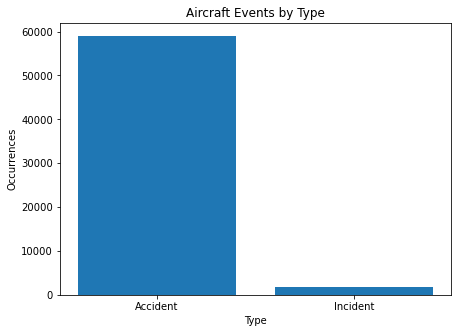

In [229]:
plt.figure(figsize = (7,5))
plt.bar(clean_df['Investigation.Type'].value_counts().index, clean_df['Investigation.Type'].value_counts().values)
plt.title('Aircraft Events by Type')
plt.xlabel('Type')
plt.ylabel('Occurrences')